In [1]:
from func_def import *
df = pd.read_csv('data_processed.csv').reset_index(drop=True)
df.head(3)

,date,result,fighter,opponent,title,method,fight_time,rounds,f_rev,f_ctrl,f_win_perc,f_win_streak,o_rev,o_ctrl,o_win_perc,o_win_streak,f_td%,f_sig_str%,o_td%,o_sig_str%,f_sub_att,o_sub_att,f_total_str_lnd,f_total_str_att,f_head_str_lnd,f_head_str_att,f_body_str_lnd,f_body_str_att,f_leg_str_lnd,f_leg_str_att,f_distance_str_lnd,f_distance_str_att,f_clinch_str_lnd,f_clinch_str_att,f_ground_str_lnd,f_ground_str_att,o_total_str_lnd,o_total_str_att,o_head_str_lnd,o_head_str_att,o_body_str_lnd,o_body_str_att,o_leg_str_lnd,o_leg_str_att,o_distance_str_lnd,o_distance_str_att,o_clinch_str_lnd,o_clinch_str_att,o_ground_str_lnd,o_ground_str_att
0,2023-11-04,W,Jailton Almeida,Derrick Lewis,Heavyweight Bout,Decision - Unanimous,25.0,5,1,21.17,1.0,5,0,0.95,0.67,1,0.4,0.67,0.0,0.51,4,0,120,153,32,48,5,5,1,3,5,7,3,8,30,41,28,54,17,33,3,6,0,0,2,10,1,1,17,28
1,2023-11-04,L,Don'Tale Mayes,Rodrigo Nascimento,Heavyweight Bout,Decision - Unanimous,25.0,3,0,0.65,0.5,1,0,2.35,0.75,2,0.0,0.49,0.0,0.45,0,0,105,190,39,103,30,44,10,12,55,128,24,31,0,0,91,180,51,132,9,11,10,11,58,134,12,20,0,0
2,2023-11-04,W,Caio Borralho,Abus Magomedo,Middleweight Bout,Decision - Unanimous,25.0,3,0,2.28,1.0,4,0,0.00,0.50,-1,0.0,0.49,NaN,0.35,0,0,70,126,33,73,11,15,7,15,50,102,0,0,1,1,39,110,19,74,14,24,5,9,38,107,0,0,0,0


In [2]:
df.shape

(7018, 50)

In [4]:
# Creating required statistics
#INCLUDE_STATS = [item[2:] for item in df.columns if 'f_' in item] #all statistics
INCLUDE_STATS = ['rev','ctrl','win_perc','win_streak','td%','sig_str%']

print(f"Constructing statistics:['f_','o_']x{INCLUDE_STATS}")
for stat in INCLUDE_STATS:
    df[f'current_f_{stat}_mean'] = [get_current_stat_mean(fighter=df.loc[i,'fighter'],time=df.loc[i,'date'],stat=stat,data=df) for i in tqdm(df.index)]    
    df[f'current_o_{stat}_mean'] = [get_current_stat_mean(fighter=df.loc[i,'opponent'],time=df.loc[i,'date'],stat=stat,data=df) for i in tqdm(df.index)] 

beckup = df.copy()
df = df[['date','result','method','rounds','fighter','opponent','fight_time'] + [f'f_{col}' for col in INCLUDE_STATS] + [f'o_{col}' for col in INCLUDE_STATS]]
df.head(3)

Constructing statistics:["f_","o_"]x['rev', 'ctrl', 'win_perc']


100%|██████████| 7018/7018 [03:16<00:00, 35.79it/s] 


,date,result,method,rounds,fighter,opponent,fight_time,f_rev,f_ctrl,f_win_perc,o_rev,o_ctrl,o_win_perc
0,2023-11-04,W,Decision - Unanimous,5,Jailton Almeida,Derrick Lewis,25.0,1,21.17,1.0,0,0.95,0.67
1,2023-11-04,L,Decision - Unanimous,3,Don'Tale Mayes,Rodrigo Nascimento,25.0,0,0.65,0.5,0,2.35,0.75
2,2023-11-04,W,Decision - Unanimous,3,Caio Borralho,Abus Magomedo,25.0,0,2.28,1.0,0,0.00,0.50


In [18]:
# beckup point
#df = beckup.copy()
#df.head(3)

,date,result,fighter,opponent,title,method,fight_time,rounds,f_rev,f_ctrl,f_win_perc,f_win_streak,o_rev,o_ctrl,o_win_perc,o_win_streak,f_td%,f_sig_str%,o_td%,o_sig_str%,f_sub_att,o_sub_att,f_total_str_lnd,f_total_str_att,f_head_str_lnd,f_head_str_att,f_body_str_lnd,f_body_str_att,f_leg_str_lnd,f_leg_str_att,f_distance_str_lnd,f_distance_str_att,f_clinch_str_lnd,f_clinch_str_att,f_ground_str_lnd,f_ground_str_att,o_total_str_lnd,o_total_str_att,o_head_str_lnd,o_head_str_att,o_body_str_lnd,o_body_str_att,o_leg_str_lnd,o_leg_str_att,o_distance_str_lnd,o_distance_str_att,o_clinch_str_lnd,o_clinch_str_att,o_ground_str_lnd,o_ground_str_att,current_f_rev_mean,current_o_rev_mean,current_f_ctrl_mean,current_o_ctrl_mean,current_f_win_perc_mean,current_o_win_perc_mean
0,2023-11-04,W,Jailton Almeida,Derrick Lewis,Heavyweight Bout,Decision - Unanimous,25.0,5,1,21.17,1.0,5,0,0.95,0.67,1,0.4,0.67,0.0,0.51,4,0,120,153,32,48,5,5,1,3,5,7,3,8,30,41,28,54,17,33,3,6,0,0,2,10,1,1,17,28,0.0,0.11,4.43,0.97,0.80,0.73
1,2023-11-04,L,Don'Tale Mayes,Rodrigo Nascimento,Heavyweight Bout,Decision - Unanimous,25.0,3,0,0.65,0.5,1,0,2.35,0.75,2,0.0,0.49,0.0,0.45,0,0,105,190,39,103,30,44,10,12,55,128,24,31,0,0,91,180,51,132,9,11,10,11,58,134,12,20,0,0,0.0,0.00,3.06,2.60,0.20,0.54
2,2023-11-04,W,Caio Borralho,Abus Magomedo,Middleweight Bout,Decision - Unanimous,25.0,3,0,2.28,1.0,4,0,0.00,0.50,-1,0.0,0.49,NaN,0.35,0,0,70,126,33,73,11,15,7,15,50,102,0,0,1,1,39,110,19,74,14,24,5,9,38,107,0,0,0,0,1.0,0.00,7.13,0.21,0.75,0.50


In [5]:
# Feature differencial columns (=final features) 
FEATURES = set([item[2:] for item in df.columns[df.columns.get_loc('fight_time')+1:]])

for feature in FEATURES:
    df[f'{feature}_dif'] = df[f'f_{feature}'] - df[f'o_{feature}']

df = df[['date','result','method','rounds','fighter','opponent','fight_time'] + [col for col in df.columns if '_dif' in col]]
df.head(3)

,date,result,method,rounds,fighter,opponent,fight_time,rev_dif,win_perc_dif,ctrl_dif
0,2023-11-04,W,Decision - Unanimous,5,Jailton Almeida,Derrick Lewis,25.0,1,0.33,20.22
1,2023-11-04,L,Decision - Unanimous,3,Don'Tale Mayes,Rodrigo Nascimento,25.0,0,-0.25,-1.70
2,2023-11-04,W,Decision - Unanimous,3,Caio Borralho,Abus Magomedo,25.0,0,0.50,2.28


<AxesSubplot:xlabel='result', ylabel='win_perc_dif'>

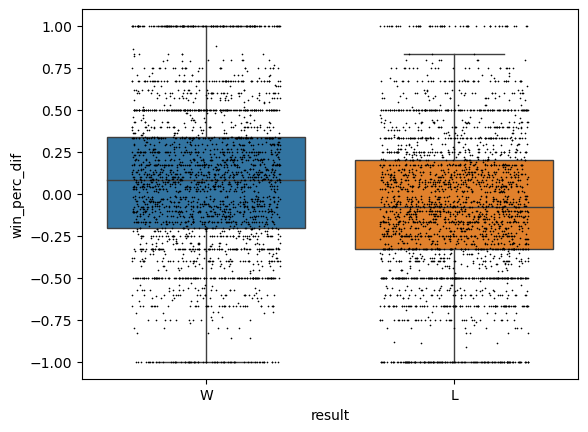

In [14]:
# Visualize STAT effect:
SELECTED_FEATURE = 'win_perc_dif'
sns.boxplot(x='result',y=SELECTED_FEATURE,data=df[df[SELECTED_FEATURE]!=0],linewidth=1,fliersize=0)
sns.stripplot(x='result',y=SELECTED_FEATURE,data=df[df[SELECTED_FEATURE]!=0],size=1.2,jitter=0.3,color='black')

In [10]:
# Normalize features:
FEATURES = list(df.columns[list(df.columns).index('fight_time')+1:])

for feature in tqdm(FEATURES):
    mean = df[feature].mean()
    std = df[feature].std()
    df[feature] = (df[feature] - mean)/std

df.describe()

  0%|          | 0/1 [00:00<?, ?it/s]/homes/sagic/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
100%|██████████| 1/1 [00:00<00:00, 366.28it/s]


,rounds,fight_time,str_acc_mean_dif
count,6999.000000,6999.000000,5.145000e+03
mean,3.179740,17.833286,-4.915623e-17
std,0.572032,8.421973,1.000000e+00
min,3.000000,0.080000,-5.229305e+00
25%,3.000000,10.530000,-5.538790e-01
50%,3.000000,20.830000,4.380902e-03
75%,3.000000,25.000000,5.626408e-01
max,5.000000,25.000000,5.656762e+00


In [15]:
df.to_csv('data_features_ready.csv',index=None)
print('data_features_ready.csv saved.')
pd.read_csv('data_features_ready.csv').head(3)

data_features_ready.csv saved.


,date,result,method,rounds,fighter,opponent,fight_time,rev_dif,win_perc_dif,ctrl_dif
0,2023-11-04,W,Decision - Unanimous,5,Jailton Almeida,Derrick Lewis,25.0,1,0.33,20.22
1,2023-11-04,L,Decision - Unanimous,3,Don'Tale Mayes,Rodrigo Nascimento,25.0,0,-0.25,-1.70
2,2023-11-04,W,Decision - Unanimous,3,Caio Borralho,Abus Magomedo,25.0,0,0.50,2.28


In [ ]:
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

In [79]:
# additional features: head_str_acc,
for prefix in ['f_','o_']:
    df[f'{prefix}head_str_acc'] = df[f'{prefix}head_str_succ']/df[f'{prefix}head_str_att']

In [80]:
# Constructing dif columns(=final features)
for feature in tqdm(STAT_COLUMNS):
    df[f'{feature}_mean_dif'] = df[f'f_{feature}_mean'] - df[f'o_{feature}_mean']

ENRICHMENT_COLUMNS = [col for col in df.columns if 'streak' in col]
ENRICHMENT_COLUMNS = list(set([col[2:] if ('f_' in col) or ('o_' in col) else col for col in ENRICHMENT_COLUMNS]))

for column in tqdm(ENRICHMENT_COLUMNS):
    df[f'{column}_dif'] = df[f'f_{column}'] - df[f'o_{column}']

data = df[['event_url','date','result','fighter','opponent','title','method','round','time','format']+[col for col in df.columns if '_dif' in col]]
data.head(3)    

 91%|█████████▏| 21/23 [00:00<00:00, 2397.98it/s]


KeyError: 'f_head_str_acc_mean'

In [78]:
# Normalize features:
FEATURES = list(data.columns[list(data.columns).index('format')+1:])

for feature in tqdm(FEATURES):
    mean = data[feature].mean()
    std = data[feature].std()
    df[feature] = (df[feature] - mean)/std

df.describe()

100%|██████████| 23/23 [00:00<00:00, 1840.52it/s]


,round,f_head_str_perc,f_body_str_perc,f_leg_str_perc,f_dist_str_perc,f_clinch_str_perc,f_ground_str_perc,o_head_str_perc,o_body_str_perc,o_leg_str_perc,o_dist_str_perc,o_clinch_str_perc,o_ground_str_perc,f_head_str_succ,f_head_str_att,f_body_str_succ,f_body_str_att,f_leg_str_succ,f_leg_str_att,f_distance_str_succ,f_distance_str_att,f_clinch_str_succ,f_clinch_str_att,f_ground_str_succ,f_ground_str_att,o_head_str_succ,o_head_str_att,o_body_str_succ,o_body_str_att,o_leg_str_succ,o_leg_str_att,o_distance_str_succ,o_distance_str_att,o_clinch_str_succ,o_clinch_str_att,o_ground_str_succ,o_ground_str_att,f_win_perc,o_win_perc,f_current_win_streak,o_current_win_streak,f_current_lose_streak,o_current_lose_streak,f_str_att,o_str_att,f_str_succ,o_str_succ,f_str_succ_mean,o_str_succ_mean,f_head_str_succ_mean,o_head_str_succ_mean,f_body_str_succ_mean,o_body_str_succ_mean,f_clinch_str_att_mean,o_clinch_str_att_mean,f_ground_str_perc_mean,o_ground_str_perc_mean,f_win_perc_mean,o_win_perc_mean,f_head_str_att_mean,o_head_str_att_mean,f_clinch_str_succ_mean,o_clinch_str_succ_mean,f_dist_str_perc_mean,o_dist_str_perc_mean,f_head_str_perc_mean,o_head_str_perc_mean,f_distance_str_succ_mean,o_distance_str_succ_mean,f_ground_str_succ_mean,o_ground_str_succ_mean,f_body_str_att_mean,o_body_str_att_mean,f_distance_str_att_mean,o_distance_str_att_mean,f_leg_str_att_mean,o_leg_str_att_mean,f_str_att_mean,o_str_att_mean,f_clinch_str_perc_mean,o_clinch_str_perc_mean,f_ground_str_att_mean,o_ground_str_att_mean,f_body_str_perc_mean,o_body_str_perc_mean,f_leg_str_succ_mean,o_leg_str_succ_mean,f_leg_str_perc_mean,o_leg_str_perc_mean,f_head_str_acc,o_head_str_acc,str_succ_mean_dif,head_str_succ_mean_dif,body_str_succ_mean_dif,clinch_str_att_mean_dif,ground_str_perc_mean_dif,win_perc_mean_dif,head_str_att_mean_dif,clinch_str_succ_mean_dif,dist_str_perc_mean_dif,head_str_perc_mean_dif,distance_str_succ_mean_dif,ground_str_succ_mean_dif,body_str_att_mean_dif,distance_str_att_mean_dif,leg_str_att_mean_dif,str_att_mean_dif,clinch_str_perc_mean_dif,ground_str_att_mean_dif,body_str_perc_mean_dif,leg_str_succ_mean_dif,leg_str_perc_mean_dif,current_lose_streak_dif,current_win_streak_dif
count,7262.000000,7262.00000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7262.000000,7175.000000,7173.000000,7.262000e+03,7.262000e+03,7.262000e+03,7.262000e+03,7.262000e+03,7.262000e+03,7.262000e+03,7.262000e+03,7.262000e+03,7.262000e+03,7.262000e+03,7.262000e+03,7.262000e+03,7.262000e+03,7.262000e+03,7.262000e+03,7.262000e+03,7.262000e+03,7.262000e+03,7.262000e+03,7.262000e+03,7.262000e+03,7.262000e+03
mean,2.353346,0.59978,0.201097,0.175103,0.662167,0.148631,0.166790,0.606666,0.197326,0.171321,0.660633,0.148035,0.168214,22.526852,63.122556,7.473836,10.777609,5.937758,7.383641,25.914211,66.730790,5.095015,7.341091,4.929221,7.211925,23.015147,63.989121,7.434591,10.775406,5.883365,7.307078,26.192922,67.376480,5.103553,7.354586,5.036629,7.340540,0.250836,0.248004,0.315891,0.300193,1.321261,1.322914,81.283806,82.071606,3

<AxesSubplot:xlabel='result', ylabel='str_succ_mean_dif'>

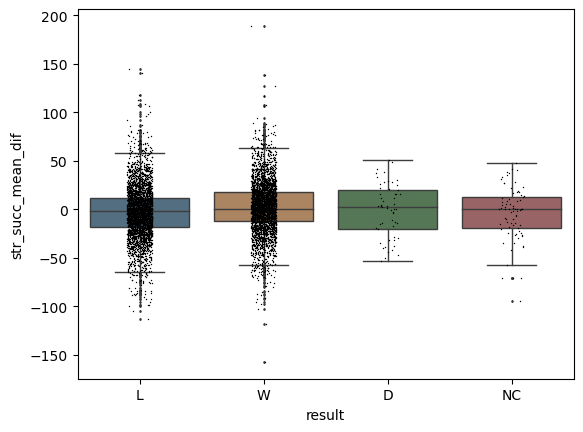

In [71]:
# Visualize features effect:
SELECTED_FEATURE = 'str_succ_mean_dif'
sns.boxplot(x='result',y=SELECTED_FEATURE,data=data,saturation=0.3,linewidth=1,fliersize=1)
sns.stripplot(x='result',y=SELECTED_FEATURE,data=data,size=1,jitter=True,color='black')

<AxesSubplot:xlabel='str_succ_mean_dif', ylabel='Count'>

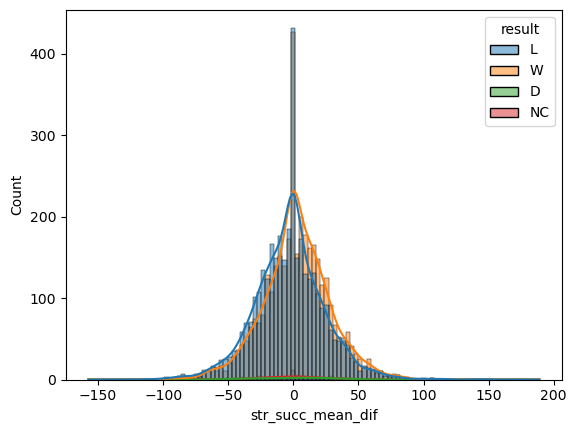

In [72]:
# Visualize features effect:
sns.histplot(x='str_succ_mean_dif',data=data,hue='result',kde=True)
#sns.histplot(x='head_str_perc_mean_dif',data=data,legend='result')

In [73]:
data.to_csv('data_features_ready.csv',index=None)
print('data_features_ready.csv saved.')
pd.read_csv('data_features_ready.csv').head(3)

data_features_ready.csv saved.


,event_url,date,result,fighter,opponent,title,method,round,time,format,str_succ_mean_dif,head_str_succ_mean_dif,body_str_succ_mean_dif,clinch_str_att_mean_dif,ground_str_perc_mean_dif,win_perc_mean_dif,head_str_att_mean_dif,clinch_str_succ_mean_dif,dist_str_perc_mean_dif,head_str_perc_mean_dif,distance_str_succ_mean_dif,ground_str_succ_mean_dif,body_str_att_mean_dif,distance_str_att_mean_dif,leg_str_att_mean_dif,str_att_mean_dif,clinch_str_perc_mean_dif,ground_str_att_mean_dif,body_str_perc_mean_dif,leg_str_succ_mean_dif,leg_str_perc_mean_dif,current_lose_streak_dif,current_win_streak_dif
0,http://www.ufcstats.com/event-details/c8a49ff2...,2023-10-07,L,Grant Dawson,Bobby Green,Lightweight Bout,KO/TKO,1,0:33,5 Rnd (5-5-5-5-5),-37.151515,-20.373737,-10.702020,-3.237374,0.258030,0.095596,-48.671717,-3.277778,-0.267576,0.070808,-38.373737,4.500000,-13.404040,-72.979798,-7.868687,-69.944444,0.006869,6.272727,-0.049242,-6.075758,-0.022222,1,-1
1,http://www.ufcstats.com/event-details/c8a49ff2...,2023-10-07,W,Joe Pyfer,Abdul Razak Alhassa,Middleweight Bout,Submission,2,2:05,3 Rnd (5-5-5),-10.000000,-9.818182,1.772727,-5.818182,0.251818,0.233730,-12.727273,-4.000000,-0.096364,-0.102273,-8.318182,2.318182,1.454545,-12.409091,-3.409091,-14.681818,-0.155455,3.545455,0.218182,-1.954545,-0.115000,0,1
2,http://www.ufcstats.com/event-details/c8a49ff2...,2023-10-07,L,Alex Morono,Joaquin Buckley,Welterweight Bout,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),23.733333,29.366667,-4.533333,3.933333,0.036444,-0.188230,40.466667,2.233333,-0.026111,0.260222,20.155556,1.344444,-9.511111,22.700000,-1.155556,29.800000,-0.008222,3.166667,-0.222333,-1.100000,-0.037000,-3,1
